# Instructions {-}

1. Download the provided jupyter notebook file to your computer.
2. Write all your answers and code into this notebook file.
3. When your work is completed, export your notebook to an HTML file.
4. Submit your HTML file and a copy of the notebook to the assignment page on Moodle.



## Identification {-}

### Your Information {-}

Your Last Name:
Latrofa

Your First Name:
Ania

### Group Members (list any classmates you worked with on this problem set) {-}

Your Group Members:

In [36]:
# Loading initial packages
import pandas as pd
import numpy as np
# Packages for running a linear regression
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Problem 1 - Estimating Impacts on Steps, Part II {-}

In your previous problem set, I asked you to analyze a data set to estimate the effects of a program to increase the number of steps people take a day. Most answers included a comparison of means between the treatment and control groups or a bivariate regression, and concluded that the program had a statistically significant effect of 2,793 steps. 

_The goal of this problem set question is to help you see the importance of exploratory data analysis and visualization __before__ running any regressions._

Recall the setup of the problem:

You have designed and implemented a randomized control trial (RCT), where you track peoples’ steps with a pedometer for 3 initial weeks. After this tracking period, participants in the study were divided into a treatment and control group. The treatment group got a push notification on their phone telling them their average step count over the initial weeks, while no message was sent to the control group. You then recorded total steps after 1 additional week from when this notification was sent out.

The data set `Steps.csv` contains the data from the study. It includes the following variables:

* `treatment` – a binary indicator of whether a participant was in the treatment or control group
* `BaselineSteps` – the total number of steps recorded after the initial 3 weeks
* `PostSteps` – the total number of steps recorded after 4 weeks. Note, this value includes the BaselineSteps, plus the additional steps taken in the final week (after treatment was administered)
* `StepChange` – the change in steps between the `PostSteps` and `BaselineSteps` measurements. This is equal to the number of new steps taken in the final week of the program

The same file `Steps.csv` has been provided. Read in this data set and then answer the following questions.

In [2]:
# Your code here:
steps = pd.read_csv('/Users/anialatrofa/Desktop/London School of Economics/Y1/AT/Study Material/PP422/Python/Data/W7 (6) Steps.csv')

## 1-A {-}

If properly conducted, a randomized control trial (RCT) helps ensure that the treatment and control groups are equivalent at baseline. If these groups are equivalent at baseline, this helps us attribute a causal effect to the treatment we are studying. Is there evidence in the data that supports this claim? To answer this question, compare the average number of steps at baseline between treatment and control groups. Is the difference between the two groups statistically significant? What does this say about the credibility of this RCT?

Hint: for statistical significance, you may use either a regression analysis or a t-test for the difference in means. Code for both of these approaches were introduced in prior problem sets.

In [6]:
# Comparing the difference in baseline steps:

model = smf.ols('BaselineSteps ~ treatment', data=steps).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          BaselineSteps   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     46.09
Date:                Sun, 16 Nov 2025   Prob (F-statistic):           1.19e-11
Time:                        17:17:09   Log-Likelihood:            -1.3764e+05
No. Observations:               11363   AIC:                         2.753e+05
Df Residuals:                   11361   BIC:                         2.753e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.551e+04    568.779    132.762      0.0

_Your explanation here:_

The regression shows that the p-value of treatment is below 5%, which means that the difference between the two groups at baseline is statistically significant. We can deduct that there might be issues with the RCT we are relying on.

## 1-B {-}

Now let’s focus on the outcome variable (`StepChange`), which measures the number of steps that people took in the final week of the program. 

1.  What would you expect to be the shape of the distribution of this variable (that is, what shape would you expect a histogram to look like)?
2.  After stating your expectation, create a histogram of this variable. Is this what you expected? What does this say about the credibility of the outcome variable used in this RCT?

_Your expected distribution and explanation here:_

I would expect the distribution to be approximately normal, with only a few positive or negative values at the extremes.

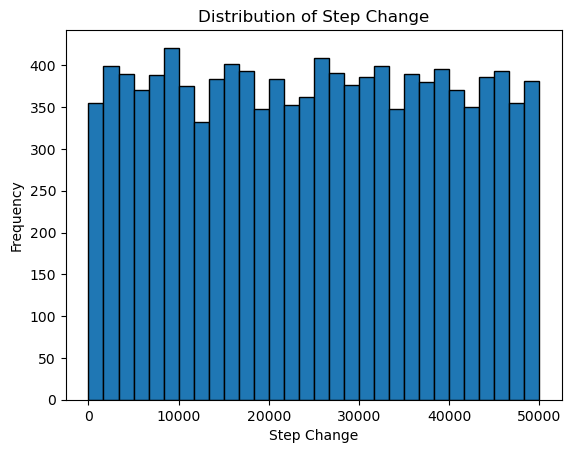

In [8]:
# Your histogram here:

import matplotlib.pyplot as plt

plt.hist(steps['StepChange'], bins=30, edgecolor='black')
plt.xlabel('Step Change')
plt.ylabel('Frequency')
plt.title('Distribution of Step Change')
plt.show()

## 1-C {-}

What lessons do you draw from this exercise as you think about the next time you are about to start running regressions on a data set?

_Your explanation here [maximum one paragraph]:_

Next time, I would explore the data more in detail, because analysis early on could help understand better if there are issues to be expected, or if there might be issues with the data (so that we could approach the problem differently).

## 1-D The REAL Data Set {-}

It turns out the data set you analyzed is a masked version of a data set that was used to produce an influential paper that argued that dishonesty can be reduced by asking people to sign a statement of honest intent before providing information (_i.e._, at the top of a document) rather than after providing information (_i.e._, at the bottom of a document). The paper was based on a field experiment conducted by an auto insurance company in the southeastern United States. Customers were asked to report the current odometer reading of up to four cars covered by their policy. They were randomly assigned to sign a statement indicating, “I promise that the information I am providing is true” either at the top or bottom of the form. 

Customers assigned to the 'sign-at-the-top' condition reported driving 2,400 more miles than those assigned to the 'sign-at-the-bottom' condition. This was seen as evidence that signing at the top could be a cheap and effective way of reducing dishonesty.

The data set you analyzed across these problem sets is the one used in this paper except that I referred to the outcome as steps taken rather than miles driven, and I focused on the odometer reading of the first car only (hence the impact you found was slightly different than the one reported in the paper). 

The analysis you conducted above plus some additional analyses provided compelling evidence that the findings from the original paper were not real and were partially based on fake data. [This posting](https://datacolada.org/98) goes over many of the details, and there has been recent follow-up reporting by the [Financial Times](https://www.ft.com/content/64f76797-d390-45fd-b00f-2cab6412bdcb). The authors of the paper retracted the original publication, and several of them issued personal replies to the posting. This controversy raised important issues about data analysis, reproducibility of research findings, detection of fake data, and admission of error.

Feel free to comment on the Moodle [forum](https://moodle.lse.ac.uk/mod/hsuforum/view.php?id=1809615) with your views about any of these issues.


# Problem 2 - Bootstrap Estimates of Income Inequality {-}

There are many different measures of income inequality, including comparisons between the mean and median income, the income share of the top 1%, and measures like the Gini coefficient. An alternative way to measure inequality is the “P90/P10” ratio, which calculates the ratio of the 90th percentile of income to the 10th percentile of income. This is also sometimes referred to as the ratio of the top 10% to the bottom 10%.

This problem asks you to evaluate this measure of income inequality using the survey information from South Africa that you used in a previous problem set. The problems will walk you through how to apply a bootstrap procedure to generate confidence intervals for a new estimator where the Central Limit Theorem may not apply.


## 2-0: Data Cleaning {-}

Load in the provided `palms_clean.csv` data, which is identical to what you used in your previous problem set.

As a reminder, the `imputed_real` variable contains information on real monthly income. We will use this variable as the basis for our analysis of income inequality. Other variables include:

1. `Popgroup` – respondent population group. This is a numeric variable corresponding to the following categories:
    * `1` African/Black
    * `2` Coloured
    * `3` Indian/Asian
    * `4` White
    * `5` Other
    * `9` Unspecified
2. `Gender`- respondent gender, which the data collection agency only divided into Male / Female. The numeric coding of this variable corresponds to:
    * `1` Male
    * `2` Female
    * `9` Unspecified


Clean the data in the following ways:

1. Drop rows that contain `NA` values for the `imputed_real` variable
2. Recode the `popgroup` variable to be a categorical type with informative category names (you may reuse your code from Problem Set 4 here).
3. Save the index as a separate column in the dataset which can act as a unique identifier for each row. You can achieve this with the `.reset_index()` method, or by extracting and saving the index directly with the `.index` attribute. It will be helpful to have these unique identifiers for later portions of the analysis, and you may find it easier to work with them if they are stored in a column instead of the index.

In [ ]:
# Reading in and cleaning your data

palms = pd.read_csv('/Users/anialatrofa/Desktop/London School of Economics/Y1/AT/Study Material/PP422/Python/Data/W7 (6) palms_clean.csv')

palms = palms.dropna(subset=['imputed_real'])

palms['population group'] = palms['popgroup'].astype('category').cat.rename_categories(
    {1: 'African/Black',
     2: 'Coloured',
     3: 'Indian/Asian',
     4: 'White',
     5: 'Other',
     9: 'Unspecified'}
)
palms.drop('popgroup', inplace=True, axis=1)

palms['employment status'] = palms['empstat1'].astype('category').cat.rename_categories(
    {1: 'Employed',
     2: 'Unemployed',
     0: 'Not economically active'}
)
palms.drop('empstat1', inplace=True, axis=1)

palms['sex'] = palms['gender'].astype('category').cat.rename_categories(
    {1: 'Male',
     2: 'Female',
     9: 'Unspecified'}
)
palms.drop('gender', inplace=True, axis=1)

palms = palms.reset_index()

## 2-A: Inequality in the Full Sample {-}

Using the provided data, calculate the 90:10 ratio in the full sample of your data for the `imputed_real` variable. You may calculate this value in a variety of ways. First, a pandas DataFrame has a `.quantile()` method which will calculate a quantile value at a desired level. Alternatively, the `numpy` package has a function `np.quantile()` which can be applied to an array to calculate similar values.

Report and interpret this value. Does this value seem large to you? Search online for this measure from your home country and report that as well. Note, some online sources may refer to this value as the "R/P 10%", referring to the ratio of the richest and poorest 10% of the population.

Hint: you will need to calculate this 90:10 ratio several times over the course of this problem and you may find it helpful to define a function which will perform this calculation.


In [16]:
# Your calculation here:

p90 = palms['imputed_real'].quantile(0.90)
p10 = palms['imputed_real'].quantile(0.10)
ratio_9010 = p90 / p10

print(f"The 90:10 ratio is {ratio_9010:.2f}")

The 90:10 ratio is 23.41


_Your explanation here:_

In `Italy`, online sources report the R/P 10% ratio to be around `10`, meaning that the richest 10% in the country earn roughly 10 rimes what the poorest earn. Italy's ratio is quite lower than the one obtained from our dataset, meaning that there might be a higher level of inequality in South Africa, compared to Italy.

## 2-B: Inequality by Subgroups {-}

The provided dataset also contains information on the population group for the respondents. Using this variable, calculate and report the 90:10 ratio for each population group using the full data sample. Comment on the patterns of inequality based on this subgroup calculation. Which group exhibited the highest inequality in our sample? Which group exhibited the lowest inequality in our sample?

Hint: you can use the `.groupby()` and `.apply()` methods to apply a function to each categorization. You could also use a for loop to replicate the calculation for different subsets of the data.

In [22]:
# Your calculation here:

def calculate_9010_ratio(data):
    p90 = data.quantile(0.90)
    p10 = data.quantile(0.10)
    return p90 / p10

for group in palms['population group'].unique():
    subset = palms[palms['population group'] == group]['imputed_real']
    ratio = calculate_9010_ratio(subset)
    print(f"{group}: {ratio:.2f}")

African/Black: 20.18
Coloured: 15.38
White: 19.83
Indian/Asian: 19.83


_Your explanation here_

In our sample, the African/Black group exhibits the highest level of inequality (at `20.18`), whereas the Coloured group shows the lowest level (at `15.38`).

## 2-C: Taking a Single Bootstrap {-}

The differences by group you calculated above could be due to sampling fluctuations. Ideally, we would like to calculate confidence intervals for our estimates to test if these differences are statistically significant, but no simple formula exists for confidence intervals for an estimator like the 90:10 ratio or the difference in this ratio between two groups.

One way to estimate these confidence intervals is by constructing a __bootstrap sample__. The remainder of this problem set guides you through this procedure. First, consider the 90:10 ratio in the full sample that you calculated in part 2a above. With the full data, complete the following steps:

1. Calculate how many unique observations the full data set has. Save this total size of the data as a variable `n`. 
2. Set the random seed using `numpy` by running the following code (assuming `numpy` has been imported with the alias `np`):
```python
np.random.seed(422)
```
3. Draw a sample of rows of size `n` from the full data set __with replacement__. Save this bootstrap sample as a new object named `palms_bs`. 
4. Report how many total rows are in this `palms_bs` sample. How many unique rows are in this sample `palms_bs` (hint, look at the unique values in your index id variable)?
5. Using the `palms_bs` sample, calculate and report the 90:10 ratio in this newly simulated data. How does it compare to the value you calculated for the full data set?


Hint: There are a few general approaches you can take to draw a random sample with replacement. You can use the `.sample()` method on a pandas DataFrame to draw a random sample of rows. Be sure to set 'replace=True' as an argument to have the sample be drawn with replacement. You can read the documentation for this function [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html). Alternatively, you could use the `numpy` function `np.random.randint()` to draw a random number with replacement from the possible index values. You could then use `.iloc` to filter to this subset of rows.


In [27]:
# Your calculation here:

n = len(palms)
print(f"Total observations: {n}")
np.random.seed(422)

palms_bs = palms.sample(n=n, replace=True)

print(f"Total rows in palms_bs: {len(palms_bs)}")
print(f"Unique rows in palms_bs: {palms_bs['index'].nunique()}")

ratio_bs = calculate_9010_ratio(palms_bs['imputed_real'])
ratio_full = calculate_9010_ratio(palms['imputed_real'])

print(f"90:10 ratio (bootstrap): {ratio_bs:.2f}")
print(f"90:10 ratio (full data): {ratio_full:.2f}")
print(f"Difference: {ratio_bs - ratio_full:.2f}")

Total observations: 61788
Total rows in palms_bs: 61788
Unique rows in palms_bs: 38943
90:10 ratio (bootstrap): 23.43
90:10 ratio (full data): 23.41
Difference: 0.02


_Your explanation of how the value compares here:_

The bootstrap ratio now obtained, `23.43`, is almost identical to the full data one, `23.41`. Such a small difference is due to sampling variation from drawing with replacement, and suggests that our estimate is relatively stable.

## 2-D: Taking Many Bootstraps {-}

Replicate your procedure from part 2C above `1000` times, each time saving down your calculation for the 90:10 ratio in the bootstrap sample. Once you have your results from this re-sampling, calculate and report the following:

1. What is the mean of your `1000` estimates? What is the standard deviation?
2. Create a histogram of these bootstrap estimates and comment on the shape
3. Using this simulated data, construct a 95% confidence interval for our estimate of the 90:10 ratio in the full sample

Hint: several prior problem sets have done similar simulations. Refer to your code and the solutions as a guide for setting up this problem.

Hint: you may wish to recall the `np.random.seed(422)` argument at the top of your cell (but outside the for loop) to make your sampling replicable. 

Mean of bootstrap estimates: 23.38
Standard Deviation of bootstrap estimate: 0.24


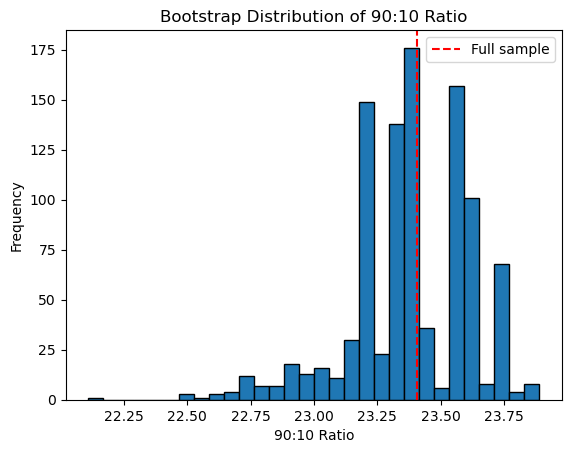

95% Confidence Interval: [22.79, 23.75]


In [29]:
# Your calculations here:
np.random.seed(422)
n_iter = 1000
bootstrap_ratios = np.zeros(n_iter)

# Loop
for i in range(n_iter):
    palms_bs = palms.sample(n=n, replace=True)
    bootstrap_ratios[i] = calculate_9010_ratio(palms_bs['imputed_real'])

# Mean and SD
print(f"Mean of bootstrap estimates: {bootstrap_ratios.mean():.2f}")
print(f"Standard Deviation of bootstrap estimate: {bootstrap_ratios.std():.2f}")

# Histogram
plt.hist(bootstrap_ratios, bins=30, edgecolor='black')
plt.xlabel('90:10 Ratio')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of 90:10 Ratio')
plt.axvline(ratio_full, color='red', linestyle='--', label='Full sample')
plt.legend()
plt.show()

# Confidence Interval
ci_lower = np.percentile(bootstrap_ratios, 2.5)
ci_upper = np.percentile(bootstrap_ratios, 97.5)
print(f"95% Confidence Interval: [{ci_lower:.2f}, {ci_upper:.2f}]")

_Your explanation here:_

The distribution is right-skewed with most observations concentrated near the mean and a long left tail of less frequent, lower values. This asymmetry suggests some sampling variation, particularly toward lower inequality estimates.

## 2-E: Bootstraps and Inequality Differences By Population Subgroup {-}

Referring back to your calculation part 2B, report the difference in the 90:10 ratio between the population groups that exhibited the highest and lowest measures for this value. This is a single estimate from our data on the difference of this measure between these groups. However, like a single estimate for the difference in mean income by group, we would like to understand if this difference could emerge due to random sampling fluctuations.

Focusing just on the difference between these two population groups, and following the procedure from parts 2C and 2D above, use a bootstrap approach to generate `1000` different estimates for the difference in 90:10 ratio between these two groups. What is the mean of your simulated values? In what percentage of the simulations was the difference positive? In what percentage of the simulations was the difference negative?

Hint: you may wish to reset the random seed with `np.random.seed(407)` as an argument at the top of your cell (but outside the for loop) to make your sampling replicable.

In [35]:
# Your calculation here:

group_high = 'African/Black'
group_low = 'Coloured'

# Original difference
ratio_high = calculate_9010_ratio(palms[palms['population group'] == group_high]['imputed_real'])
ratio_low = calculate_9010_ratio(palms[palms['population group'] == group_low]['imputed_real'])
diff_original = ratio_high - ratio_low
print(f"Original difference: {diff_original:.2f}")

np.random.seed(407)

# Bootstrap
n_iter = 1000
bootstrap_diffs = np.zeros(n_iter)

for i in range(n_iter):
    palms_bs = palms.sample(n=len(palms), replace=True)    
    ratio_high_bs = calculate_9010_ratio(palms_bs[palms_bs['population group'] == group_high]['imputed_real'])
    ratio_low_bs = calculate_9010_ratio(palms_bs[palms_bs['population group'] == group_low]['imputed_real'])
    bootstrap_diffs[i] = ratio_high_bs - ratio_low_bs

print(f"\nMean of simulated differences: {bootstrap_diffs.mean():.2f}")
print(f"Percentage positive: {(bootstrap_diffs > 0).sum() / n_iter * 100:.1f}%")
print(f"Percentage negative: {(bootstrap_diffs < 0).sum() / n_iter * 100:.1f}%")

Original difference: 4.80

Mean of simulated differences: 5.12
Percentage positive: 100.0%
Percentage negative: 0.0%


_Your explanation here:_

The difference between the two groups is statistically significant, and the group `Coloured has a 90:10 ratio constantly lower than the group Africa/Black by 4.80 points`, as we can see in all the iterations from the bootstrap.
The difference in inequality between the groups is not due to randomness, and we could assume such a difference exists in the entire population.

## 2-F: Conclusions About Inequality {-}

Based on your bootstrap calculations, does there appear to be a significant difference between the 90:10 ratios across population groups? Summarize your findings in language an intelligent but non-technical policymaker could understand [1-2 paragraphs].

_Your findings here:_

Yes, there is a significant difference between population groups. All groups show high inequality levels:
* African/Black: 20.18 (highest)
* Coloured: 15.38 (lowest)
* White: 19.83
* Indian/Asian: 19.83

The 4.8-point difference between Coloured and African/Black groups is statistically significant. Our bootstrap analysis—testing 1,000 random samples—confirmed this gap appears 100% of the time, meaning it's a real pattern in the population, not due to chance. This suggests inequality operates differently within each community, which policymakers should consider when designing interventions.

# Problem 3: Predicting College Graduation Rates[^1] {-}

[^1]: Adapted from data from ISLP

This question asks you to examine data from a sample of US Colleges to predict graduation rates. The `Colleges.csv` dataset contains information on a number of US colleges and universities, including the following variables:

* `Private`: Public/private indicator
* `Apps`: Number of applications received
* `Accept`: Number of applicants accepted
* `Enroll`: Number of new students enrolled
* `Top10perc`: New students from top 10 % of high school class
* `Top25perc`: New students from top 25 % of high school class
* `F.Undergrad`: Number of full-time undergraduates
* `P.Undergrad`: Number of part-time undergraduates
* `Outstate`: Out-of-state tuition
* `Room.Board`: Room and board costs
* `Books`: Estimated book costs
* `Personal`: Estimated personal spending
* `PhD`: Percent of faculty with Ph.D.s
* `Terminal`: Percent of faculty with terminal degree
* `S.F.Ratio`: Student/faculty ratio
* `perc.alumni`: Percent of alumni who donate
* `Expend`: Instructional expenditure per student
* `Grad.Rate`: Graduation rate





## 3-0: Data Preparation {-}

Read in the data set and save it to a variable named `colleges`. Evaluate the data structure.

The column names for this data set are not in the easiest format to work with for python. In general you will want to avoid using the period `"."` in variable names, as the `"."` has special meaning in python which we have seen. Most analysts will want to replace this `"."` with an underscore `"_"`. Further, many find it easier to work with lower case variable names.

There are a number of convenient packages to help with cleaning variable names, especially for the simple modifications described above. One is `pyjanitor` which you can read about [here](https://pyjanitor-devs.github.io/pyjanitor/). If you have never used this package, you may install it with the following code.

```python
pip install pyjanitor
```

After installing this code, you may load the package with the usual syntax

```python
import janitor
```

After doing this, run the following code (assuming you save the data to a variable `colleges`) and comment on what changes have happened to your data.

```python
colleges = colleges.clean_names()
colleges.head()
```





In [39]:
# Reading in data set and exploratory / cleaning code
import janitor

colleges = pd.read_csv('/Users/anialatrofa/Desktop/London School of Economics/Y1/AT/Study Material/PP422/Python/Data/W7 (6) College.csv')

colleges = colleges.clean_names()
colleges.head()

,name,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


_Comment on changes:_

All the column names are in lower cases, and do not have spaces in between words. All dots have been substituted by underscores.

## 3-A: Fitting a Model to the Full Data Set {-}

First, fit a simple ordinary least squares model to predict the graduation rate for a given college or university in your data set. You may find it helpful to follow the regression formula syntax introduced in Problem Set 5. Recall that you can import the following packages to run basic regressions.

```python
import statsmodels.api as sm
import statsmodels.formula.api as smf
```

For interpretative regressions like this I tend to prefer using the formula notation contained in `smf.ols()`. The formula notation allows you to specify an outcome (or dependent) variable $y$ in the regression and the various independent variables you would like to regress the outcome variable on. If $x1, x2, x3$ are all independent variables, the general formula notation is to write 'y ~ x1 + x2 + x3'. We provide a string with this formula, along with a provided data set. However, rather than use variables like $y$, we provide the relevant column names from our DataFrame.


Run a regression predicting graduation rates as a function of the following variables from the original data set:

* `Private`: Public/private indicator
* `Top10perc`: New students from top 10 % of high school class
* `Top25perc`: New students from top 25 % of high school class
* `PhD`: Percent of faculty with Ph.D.s
* `Terminal`: Percent of faculty with terminal degree
* `S.F.Ratio`: Student/faculty ratio
* `perc.alumni`: Percent of alumni who donate
* `Expend`: Instructional expenditure per student

Briefly summarize the results of your regression. Are all of your variables statistically significant? Are any of your findings contrary to what you would expect given the variable descriptions above?

In [40]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
# Your regression here:

reg1b = smf.ols('grad_rate ~ private + top10perc + top25perc + phd + terminal + s_f_ratio + perc_alumni + expend', data=colleges).fit()
print(reg1b.summary())

                            OLS Regression Results                            
Dep. Variable:              grad_rate   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     57.52
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           2.59e-73
Time:                        20:22:51   Log-Likelihood:                -3129.1
No. Observations:                 777   AIC:                             6276.
Df Residuals:                     768   BIC:                             6318.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         29.3382      4.633      6.

_Your summary of findings here:_

According to the regression I run, not all variables are statistically significant, as the p-value of many is above the 5% threshold/has a t-value below 1.96/contains 0 in the confidence interval:
* _top10perc_ and _phd_ would be significant at the 10% α-value, otherwise they are not statistically significant at the 5% confidence level;
* _terminal_, _s.f.ratio_, and _expend_ are not statistically significant (at the 1%, 5%, or 10% levels).

Only _private_, _top25perc_, and _perc.alumni_ are statistically significant at the 5% level, which means that an increase by one unit in one of those values leads to and increase (or decrease) of a value on average equal to their coefficient, holding all else constant.

## 3-B: Splitting the Data Into Training and Testing Samples {-}

To get a sense of of how well our model may perform on new data, we would like to create a holdout or testing data set to compare our model results to. To create this split of our data we will use functions contained in the sckit-learn library, which also contains many functions for fitting various machine learning and regression models.

If needed, you may install this package by running:

```python
pip install scikit-learn
```

Afterwards, run the following code (assuming your data is saved in a variable `colleges`):

```python
from sklearn.model_selection import train_test_split
colleges_train, colleges_test = train_test_split(colleges, test_size=0.3, random_state=422)
```
The first line of the above code imports the function `train_test_split` which can be used to randomly divide a data set into two distinct groups.
The second line of this function applies this function to the `colleges` data set, using the random seed 422. The results of this split are saved in two new objects: `colleges_train` and `colleges_test`. The `test_size` argument specifies the proportion of observations we would like to have in our holdout or testing sample. A commonly used split is to allocate 70% of the data for training and 30% as a testing set.

Run this code and examine the `colleges_train` and `colleges_test` DataFrames. How many observations are in each DataFrame?



In [45]:
from sklearn.model_selection import train_test_split

In [53]:
# Your code here:
colleges_train, colleges_test = train_test_split(colleges, test_size=0.3, random_state=422)
print(f"Training set: {len(colleges_train)} observations, \n Testing set: {len(colleges_test)} observations")

Training set: 543 observations, 
 Testing set: 234 observations


## 3-C: Fitting a Model to the Training Data {-}

Fit the same model you used in part 3-A above to the `colleges_train` data only. Examine the results. How do the coefficient estimates compare to your results when applied to the full data set in part 3-A?

Calculate and report the MSE of the model predictions within this training data. Note, to obtain model predictions, the model object you fit has a `get_prediction()` method which will allow you to pass new data as an argument to get predicted values for that new data.

As an example, the following code structure can generate predictions from a model:

```python
mod_example = smf.ols('y ~ x1+ x2', data_original).fit()
mod_example_predictions = mod_example.get_predictions(data_new)
mod_example_predictions.predicted_mean
```
Note, you can apply any data to the `.get_predictions()` method, so this can be used to extract fitted values from both the original data or any new data you wish to evaluate.

There is also a `fittedvalues` attribute of `mod_example` in the above code which will provide fitted values within this data set itself.


In [54]:
# Your code here:

reg2b = smf.ols('grad_rate ~ private + top10perc + top25perc + phd + terminal + s_f_ratio + perc_alumni + expend', data=colleges_train).fit()
print(reg2b.summary())

                            OLS Regression Results                            
Dep. Variable:              grad_rate   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     38.01
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           8.60e-48
Time:                        20:36:17   Log-Likelihood:                -2183.6
No. Observations:                 543   AIC:                             4385.
Df Residuals:                     534   BIC:                             4424.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         24.8395      5.733      4.

In [ ]:
y_pred_train = reg2b.fittedvalues
y_true_train = colleges_train['grad_rate']

mse_train = np.mean((y_true_train - y_pred_train)**2)
print(f"MSE Training Set: {mse_train:.4f}")

MSE Training Set: 182.1658


_Your comparison explanation here:_

All the variables from before are not statistically significant at the 5% significance level (_top10perc_, _phd_, _terminal_, _s.f.ratio_, and _expend_). The coefficients of the statistically significant ones vary a bit, but they all maintain the same direction of effect (the same sign) on the dependant variable.

## 3-D: Evaluating Model Performance on the Testing Data {-}

Now, using the model you fit in part 3-C (the model fit to only the training data), predict the estimated graduation rate for each observation in the _testing_ data. Calculate and report the MSE of the model predictions on this testing data. How does this MSE compare to the value calculated in part 3-C above.

Recalling the instructions from part 3-C above, the following code structure can generate predictions from a model:

```python
mod_example = smf.ols('y ~ x1+ x2', data_original).fit()
mod_example_predictions = mod_example.get_predictions(data_new)
mod_example_predictions.predicted_mean
```
Note, you can apply any data to the `.get_predictions()` method, so this can be used to extract fitted values from both the original data or any new data you wish to evaluate.


In [60]:
# Your code here:

reg3b = smf.ols('grad_rate ~ private + top10perc + top25perc + phd + terminal + s_f_ratio + perc_alumni + expend', data=colleges_test).fit()
print(reg3b.summary())

y_pred_test = reg3b.fittedvalues
y_true_test = colleges_test['grad_rate']

mse_test = np.mean((y_true_test - y_pred_test)**2)
print(f"MSE Test Set: {mse_test:.4f}")

                            OLS Regression Results                            
Dep. Variable:              grad_rate   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     20.70
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           2.24e-23
Time:                        20:49:55   Log-Likelihood:                -939.22
No. Observations:                 234   AIC:                             1896.
Df Residuals:                     225   BIC:                             1928.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         38.7084      7.882      4.

_Your explanation comparing MSE here:_

`Training Set MSE: 182.1658`

`Testing Set MSE: 179.4019`

The test MSE is slightly lower than the train MSE, indicating that there are similar error rates on both datasets and the model is quite reliable for new observations.
There is no overfitting and the model has good predictive power.

## 3-E: Removing Non-Significant Variables {-}

Consider the regression you ran in part 3-C on the training data. This model may have contained several variables that were not found to be statistically significant. Fit a new model where you drop (or omit) all these variables from the regression specification. Use this newly fit model to generate predicted values in the testing data set and report the MSE from this prediction. Did dropping these non-significant variables generate better predictions on the testing data?

In [61]:
# Your code here:

reg2c = smf.ols('grad_rate ~ private + top25perc + perc_alumni', data=colleges_train).fit()
print(reg2c.summary())

y_pred_trainc = reg2c.fittedvalues
y_true_trainc = colleges_train['grad_rate']

mse_trainc = np.mean((y_true_trainc - y_pred_trainc)**2)
print(f"MSE Training Set: {mse_trainc:.4f}")

                            OLS Regression Results                            
Dep. Variable:              grad_rate   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     95.37
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           1.59e-49
Time:                        21:17:48   Log-Likelihood:                -2190.4
No. Observations:                 543   AIC:                             4389.
Df Residuals:                     539   BIC:                             4406.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         35.0251      1.949     17.

_Your explanation here:_

The MSE obtained from the new training set (dropping not statistically significant variables) is `186.7602`: it has increased by a few percentage points, compared to the original Train Set MSE.
It is a good result, because the model is simpler and the increase is not too high, it is a more robust model, and we haven't lost very important explanatory variables.

In [62]:
from scipy.stats import binom
! jupyter nbconvert --to html PS6.ipynb --no-prompt

/opt/anaconda3/lib/python3.13/pty.py:95: DeprecationWarning: This process (pid=68005) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


[NbConvertApp] Converting notebook PS6.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 441089 bytes to PS6.html
